In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [46]:
X, y = make_blobs(centers=2, n_samples=100, random_state=0, cluster_std=1)

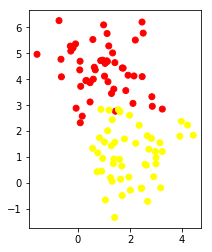

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.autumn)
plt.gca().set_aspect('equal')

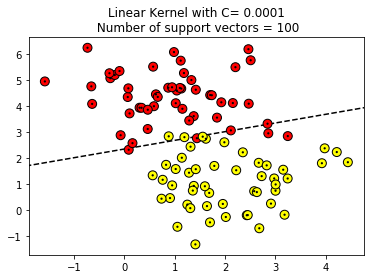

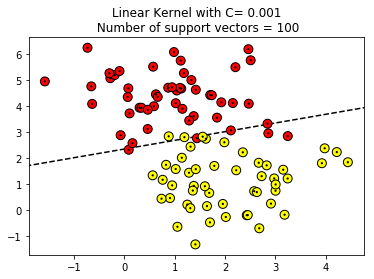

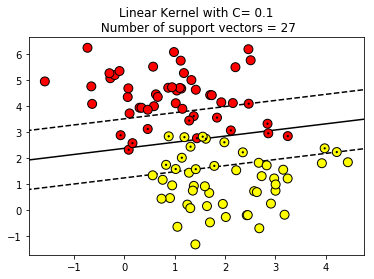

In [52]:
from sklearn import svm
X_train = X
y_train = y
kernel = 'linear'
for fig_num, C in enumerate([0.0001, 0.001, 0.1, 1, 100, 10000, 10e6][:3]):
    clf = svm.SVC(kernel=kernel,C = C )
    clf.fit(X, y)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.autumn,
                edgecolor='k',s=80)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
   
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.autumn, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    plt.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=5, lw=0.001, facecolors='none',zorder=10,c='k', edgecolors='none');


    plt.title("Linear Kernel with C= {}\n Number of support vectors = {}".format(C, len(clf.support_vectors_)))
